In [39]:
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv("sales.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       844 non-null    object
 1   year       844 non-null    int64 
 2   month      844 non-null    int64 
 3   day        844 non-null    int64 
 4   num_sales  844 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 33.1+ KB


In [42]:
df

,date,year,month,day,num_sales
0,2020-01-01,2020,1,1,335
1,2020-01-02,2020,1,2,633
2,2020-01-03,2020,1,3,475
3,2020-01-04,2020,1,4,421
4,2020-01-05,2020,1,5,494
...,...,...,...,...,...
839,2022-04-19,2022,4,19,2085
840,2022-04-20,2022,4,20,1915
841,2022-04-21,2022,4,21,1645
842,2022-04-22,2022,4,22,1638


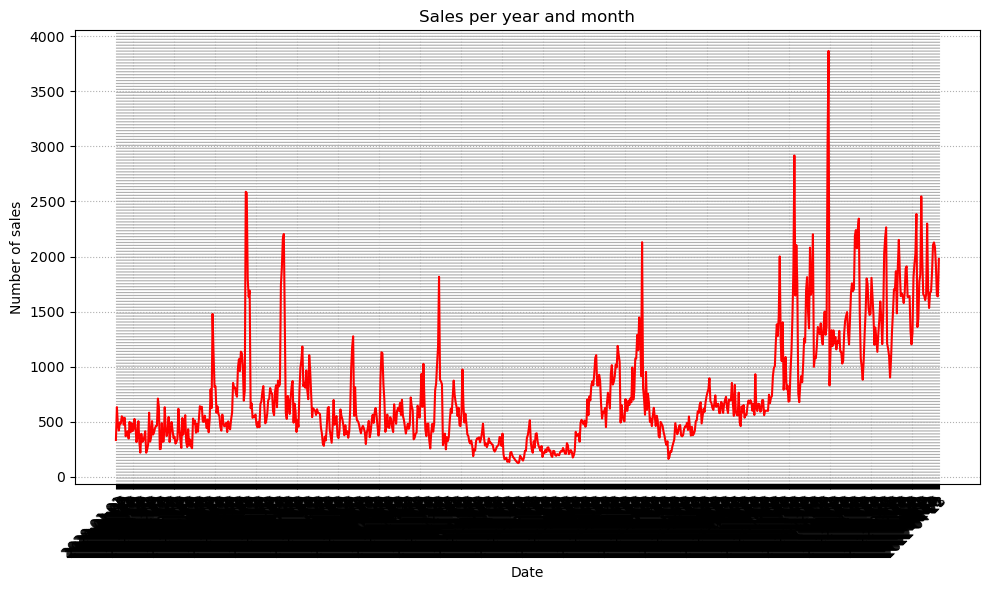

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.date, df.num_sales, color='red')
# ax.set_xticks(range(28), df.yy_mm)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sales')
ax.set_title('Sales per year and month')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)
plt.grid(linestyle=':')
plt.tight_layout();

# Weekly data

In [44]:
import pandas as pd
from pmdarima.arima import auto_arima

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

weekly_data = df['num_sales'].resample('W').sum()

best_model = auto_arima(weekly_data,
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        m=52,
                        d=None,
                        seasonal=True,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print(best_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=2176.787, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2178.647, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=2146.278, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=2134.120, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=2176.807, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=2136.190, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=2135.805, Time=1.59 sec
 ARIMA(0,1,1)(0,0,2)[52] intercept   : AIC=2136.078, Time=43.24 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=2133.877, Time=1.31 sec
 ARIMA(0,1,1)(2,0,0)[52] intercept   : AIC=2136.151, Time=33.64 sec
 ARIMA(0,1,1)(2,0,1)[52] intercept   : AIC=inf, Time=63.36 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=2175.333, Time=0.49 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=2135.869, Time=1.10 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=2135.500, Time=1.57 sec
 ARIMA(1,1,2)(1,0,0)[

In [45]:
# ARIMA Order
order = best_model.order
seasonal_order = best_model.seasonal_order
order, seasonal_order

((0, 1, 1), (1, 0, 0, 52))

In [46]:
weekly_data.head()

date
2020-01-05    2358
2020-01-12    3355
2020-01-19    2999
2020-01-26    2716
2020-02-02    2279
Freq: W-SUN, Name: num_sales, dtype: int64

/Users/lorentzyeung/miniforge3/envs/marketing/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


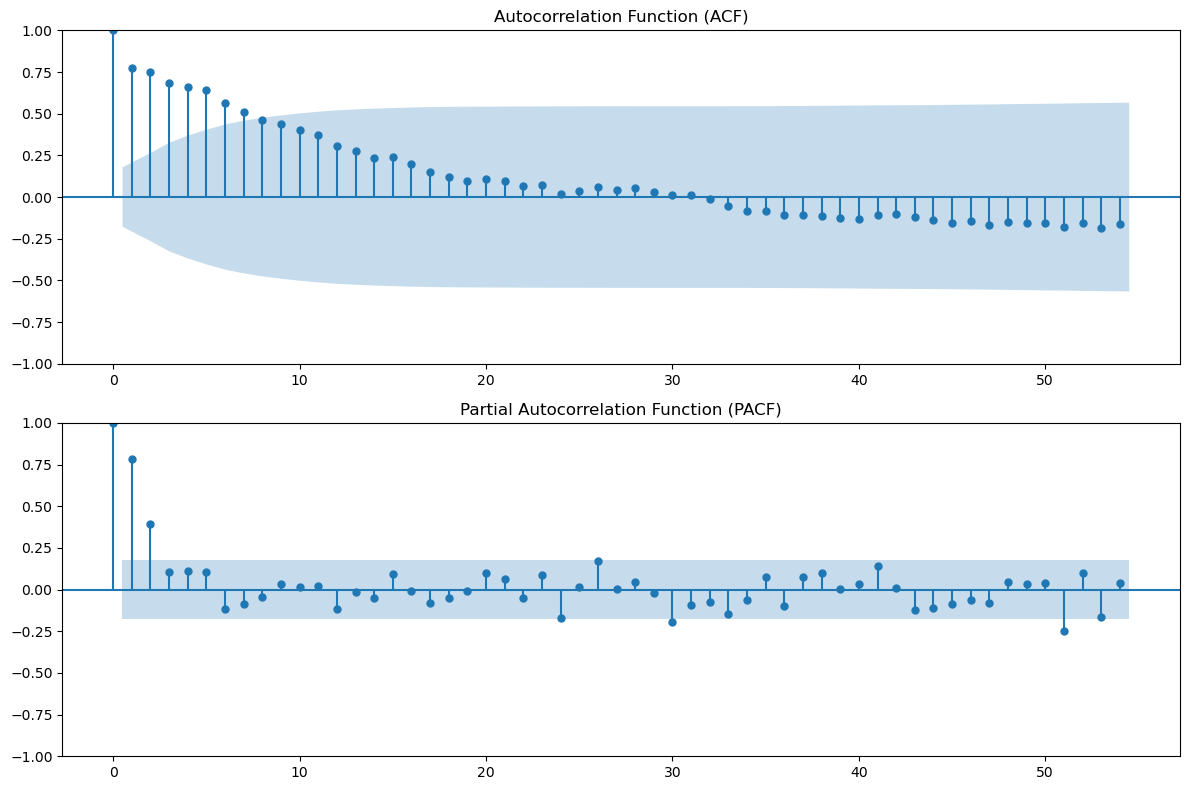

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(weekly_data.values, lags=54, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(weekly_data.values, lags=54, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()



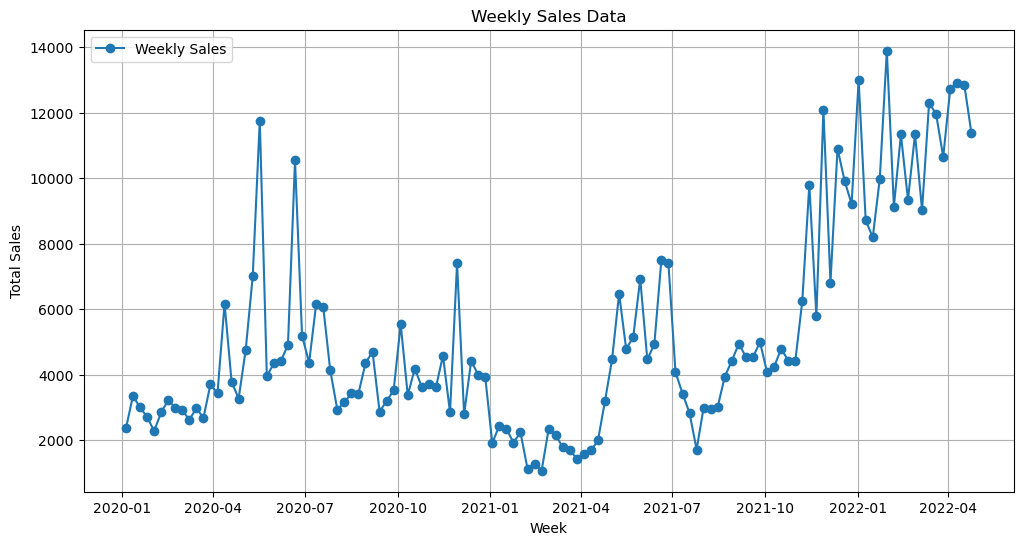

In [48]:
# Plotting the weekly aggregated data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Sales', marker='o')

plt.title('Weekly Sales Data')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(weekly_data,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()

forecast = model_fit.forecast(steps=52)

print(forecast)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96154D+00    |proj g|=  1.29369D-01

At iterate    5    f=  4.95530D+00    |proj g|=  3.13285D-04

At iterate   10    f=  4.95530D+00    |proj g|=  9.66152D-04

At iterate   15    f=  4.95506D+00    |proj g|=  1.26374D-02


 This problem is unconstrained.



At iterate   20    f=  4.95109D+00    |proj g|=  1.41809D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   4.554D-06   4.951D+00
  F =   4.9508867290451448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
2022-05-01    12592.813065
2022-05-08    13150.705211
2022-05-15    12681.587549
2022-05-22    12782.291104
2022-05-29    13274.989488
2022-06-05    12593.090485
2022-06-12    12720.703806
2022-06-19    13437.280341
2022-06-26    13406.486692
2022-07-03    12485.728844
2022-07-10    12303.741153
2022-07-17    12138.121256
2022-07-24    11828.797665
2022-07-31

In [50]:
last_data_point = pd.DataFrame({0: [weekly_data.values[-1]]}, index=[weekly_data.index[-1]])
last_data_point

,0
2022-04-24,11389


In [51]:
import matplotlib.pyplot as plt
import pandas as pd

weekly_data.index = pd.to_datetime(weekly_data.index)

# Create the forecast index starting from the day after the last date in weekly_data
forecast_start_date = weekly_data.index[-1] + pd.Timedelta(days=7)
forecast_index = pd.date_range(start=forecast_start_date, periods=len(forecast), freq='W')

# Create a DataFrame for forecast for easy plotting
forecast_df = pd.DataFrame(forecast, index=forecast_index)

forecast_df = pd.concat([last_data_point, forecast])
forecast_df.rename(columns={0: 'predicted_mean'}, inplace=True)

forecast_df.head()

,predicted_mean
2022-04-24,11389.000000
2022-05-01,12592.813065
2022-05-08,13150.705211
2022-05-15,12681.587549
2022-05-22,12782.291104


In [52]:
forecast_df.columns

Index(['predicted_mean'], dtype='object')

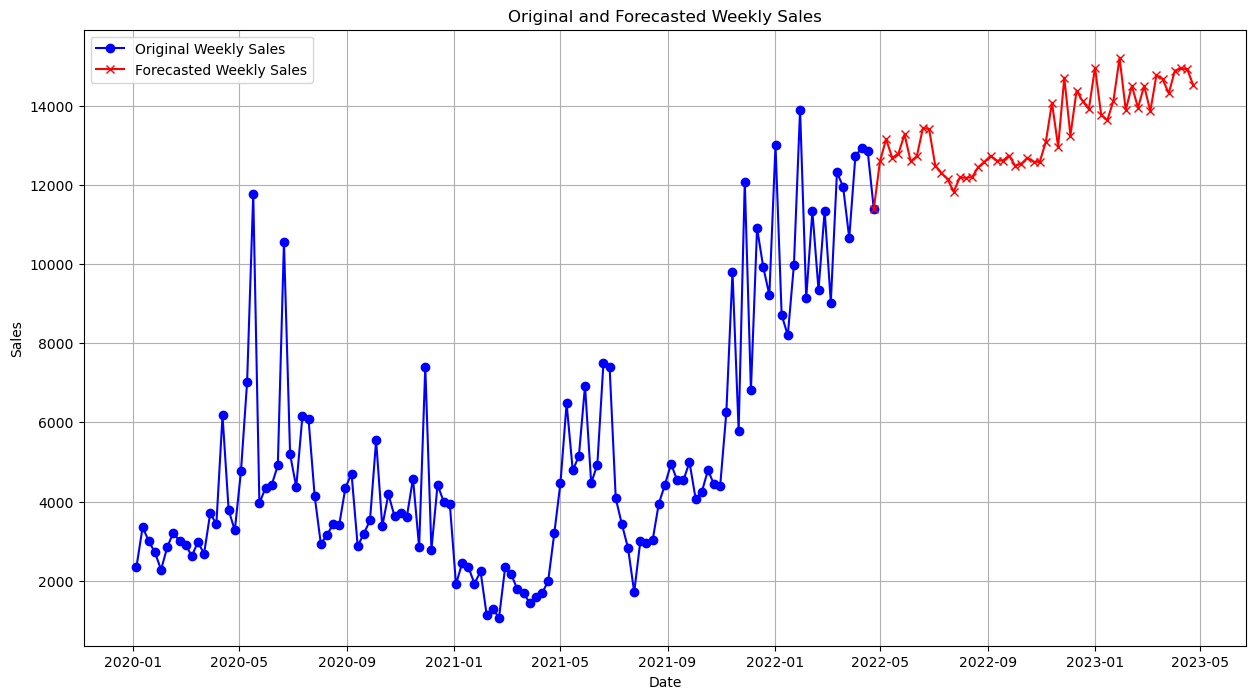

In [53]:
plt.figure(figsize=(15, 8))
plt.plot(weekly_data, label='Original Weekly Sales', color='blue', marker='o')
plt.plot(forecast_df['predicted_mean'], label='Forecasted Weekly Sales', color='red', marker='x')

plt.title('Original and Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


Practical Considerations: Sometimes, the choice of a model can be influenced by domain knowledge, interpretability, and how the model will be used in practice. Even if a model has a slightly higher AIC, it might be preferred for practical reasons.

In [54]:
# Get the AIC
aic_value = model_fit.aic
print(f"The AIC of the model is: {aic_value}")

The AIC of the model is: 1204.1145884289251


In [55]:
len(weekly_data)

121

In [56]:
# Splitting the data into train and test sets
train_size = int(len(weekly_data) * 0.85)
train, test = weekly_data[0:train_size], weekly_data[train_size:]





best_model = auto_arima(train,
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        m=52,
                        d=None,
                        seasonal=True,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print(best_model.summary())




Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=1854.395, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1857.820, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1822.504, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1833.610, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2015.248, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1825.225, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=1823.067, Time=14.99 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=1820.521, Time=1.23 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1818.524, Time=0.97 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=inf, Time=62.45 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=1823.868, Time=16.15 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=1850.813, Time=0.55 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=1811.834, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1814.802, Time=0.01 sec
 ARIMA(2,0,0)(1,0,1)[

In [57]:
# ARIMA Order
order = best_model.order
seasonal_order = best_model.seasonal_order
order, seasonal_order

((2, 0, 0), (0, 0, 1, 52))

In [58]:
52-len(test)

33

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20999D+00    |proj g|=  1.84546D-01

At iterate    5    f=  4.18971D+00    |proj g|=  3.03357D-03

At iterate   10    f=  4.18970D+00    |proj g|=  9.70402D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   9.704D-05   4.190D+00
  F =   4.1897022537395188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/lorentzyeung/miniforge3/envs/marketing/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


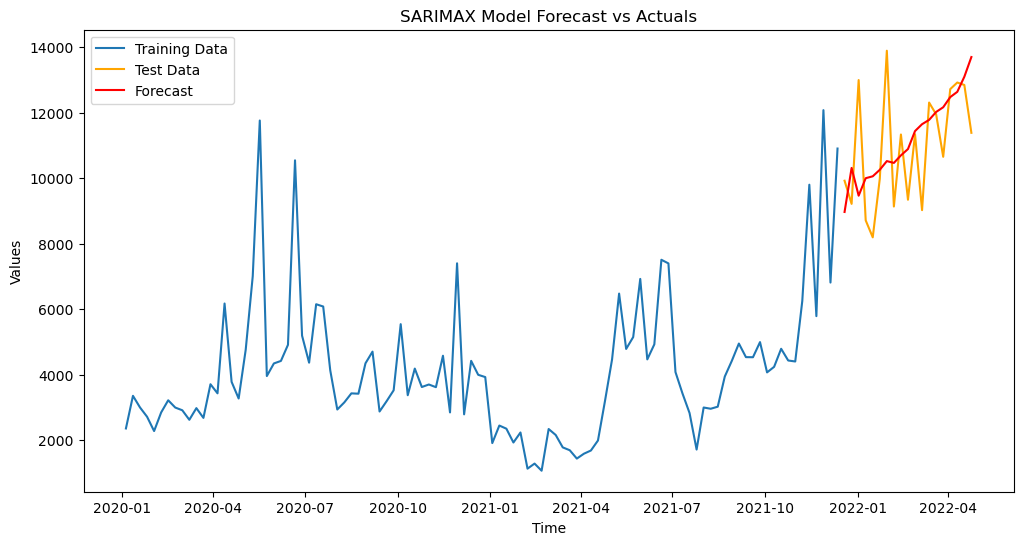

In [59]:

model = SARIMAX(train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

forecast_index = pd.date_range(start=train.index[-1], periods=len(test) + 1, freq=train.index.freq)[1:]

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('SARIMAX Model Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()